<a href="https://colab.research.google.com/github/AditMeh/deep-learning/blob/main/meta-learning/siamese_net/train_siamese_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/AditMeh/deep-learning

Cloning into 'deep-learning'...
remote: Enumerating objects: 307, done.
remote: Counting objects: 100% (307/307), done.
remote: Compressing objects: 100% (225/225), done.
remote: Total 307 (delta 143), reused 118 (delta 47), pack-reused 0
Receiving objects: 100% (307/307), 24.39 MiB | 24.95 MiB/s, done.
Resolving deltas: 100% (143/143), done.


In [2]:
%%capture
%cd ./deep-learning/meta-learning/siamese_net/
!git clone https://github.com/brendenlake/omniglot
%cd omniglot/python
!unzip images_background.zip
!unzip images_evaluation.zip
%cd ../..

In [88]:
import torch
from torchvision.io import read_image, ImageReadMode
from torch.utils.data import Dataset
import cv2

class Ommniglot_Dataset(Dataset):
    def __init__(self, pairs, is_val, transform=None):
        self.pairs = pairs
        self.transform = transform
        self.is_val = is_val

    def __len__(self):
        return len(self.pairs)

    def __getitem__(self, idx):
        path_1, path_2, label = self.pairs[idx]
        # print(path_1, path_2)
        img_1, img_2 = cv2.imread(path_1, 0), cv2.imread(path_2, 0)

        img_1, img_2 = torch.Tensor(img_1), torch.Tensor(img_2)
        label = torch.Tensor([label])
        if self.transform:
            img_1 = self.transform(img_1)
            img_2 = self.transform(img_2)

        return torch.unsqueeze(img_1.float(), 0), torch.unsqueeze(img_2.float(), 0), label.float()


In [89]:
# from dataloader import Ommniglot_Dataset
from torch.utils.data import DataLoader
from utils import generate_random_pairs
from model import SiameseNet
from train import train
import torch

TRAIN_DATASET_PATH = "omniglot/python/images_background/"
VALIDATION_DATASET_PATH = "omniglot/python/images_evaluation/"


ds_train = generate_random_pairs(TRAIN_DATASET_PATH, 30000, train=True, )
ds_val = generate_random_pairs(VALIDATION_DATASET_PATH, 10000, train=False)

train_dataset = Ommniglot_Dataset(pairs=ds_train, is_val=False)

val_dataset = Ommniglot_Dataset(pairs=ds_val, is_val=True)

train_loader = DataLoader(
    train_dataset, batch_size=32, shuffle=True)

val_loader = DataLoader(
    val_dataset, batch_size=32, shuffle=True)

tensor([1.])


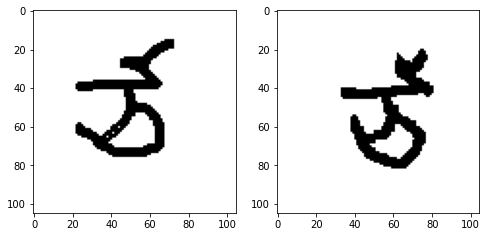

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt


x1, x2, label = next(iter(val_loader))
idx = 0


images = [torch.squeeze(x1[idx]).cpu().detach().numpy(), torch.squeeze(x2[idx]).cpu().detach().numpy()]

print(label[idx])

w = 10
h = 10
fig = plt.figure(figsize=(8, 8))
columns = 2
rows = 1
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(images[i - 1], cmap='gray')
plt.show()


In [91]:
device = (torch.device('cuda') if torch.cuda.is_available()
            else torch.device('cpu'))

print(f"Training on device {device}.")

net = SiameseNet().to(device=device)

train(net, train_loader, val_loader, n_epochs=20,
        lr=0.00001, device=device, batch_size=32, save_path="null")

Training on device cuda.


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch 1, Train Loss 0.5113239080301607, Val Loss 0.5165703905085786, Val Accuracy 0.7589856230031949
Epoch 2, Train Loss 0.2854385965748001, Val Loss 0.5145086555625684, Val Accuracy 0.7736621405750799
Epoch 3, Train Loss 0.1506124254403465, Val Loss 0.5451557462493452, Val Accuracy 0.7883386581469649
Epoch 4, Train Loss 0.07080360381568132, Val Loss 0.6259436599743633, Val Accuracy 0.784944089456869


KeyboardInterrupt: ignored